In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [91]:
train = pd.read_csv('data\\train.csv')
print(train.shape)
train.head(15)

(54706, 14)


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [92]:
lines = ['Data Value Counts']
with open('data_description.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')
    for column in ['site_id','laterality','view','age','cancer','biopsy','BIRADS','implant','density','machine_id','difficult_negative_case']:
        print(train[column].value_counts(dropna=False), file=f)
        print('', file=f)

In [93]:
train.loc[train['density']==pd.NA,'density'] = -1
train.loc[train['density']=='A','density'] = 0
train.loc[train['density']=='B','density'] = 1
train.loc[train['density']=='C','density'] = 2
train.loc[train['density']=='D','density'] = 3
train['density'] = train['density'].astype(np.float16)

train.loc[train['difficult_negative_case']==True,'difficult_negative_case'] = 1
train.loc[train['difficult_negative_case']==False,'difficult_negative_case'] = 0
train['difficult_negative_case'] = train['difficult_negative_case'].astype(np.uint8)

train.loc[train['laterality']=='L','laterality'] = 1
train.loc[train['laterality']=='R','laterality'] = 0
train['laterality'] = train['laterality'].astype(np.uint8)

train['age'] = train['age'].astype(np.float16)

In [94]:
train.head(15)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,1,CC,61.0,0,0,0,NaN,0,NaN,29,0
1,2,10006,1459541791,1,MLO,61.0,0,0,0,NaN,0,NaN,29,0
2,2,10006,1864590858,0,MLO,61.0,0,0,0,NaN,0,NaN,29,0
3,2,10006,1874946579,0,CC,61.0,0,0,0,NaN,0,NaN,29,0
4,2,10011,220375232,1,CC,55.0,0,0,0,0.0,0,NaN,21,1
5,2,10011,270344397,1,MLO,55.0,0,0,0,0.0,0,NaN,21,1
6,2,10011,541722628,0,CC,55.0,0,0,0,NaN,0,NaN,21,0
7,2,10011,1031443799,0,MLO,55.0,0,0,0,NaN,0,NaN,21,0
8,2,10025,562340703,1,CC,75.0,0,0,0,NaN,0,NaN,29,0
9,2,10025,1365269360,1,MLO,75.0,0,0,0,NaN,0,NaN,29,0


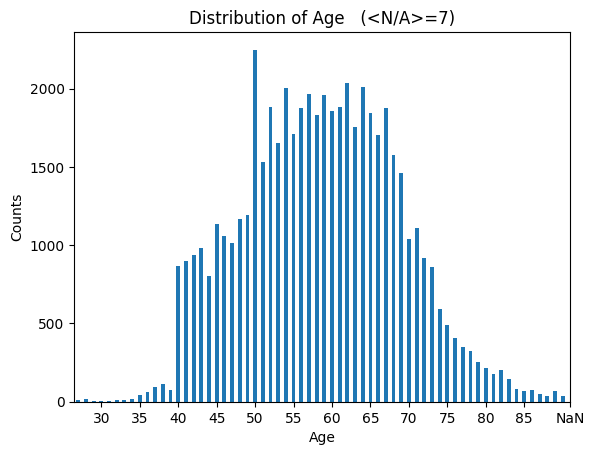

In [95]:
na_s = train.loc[:,'age'].value_counts(sort=False, dropna = False).values[-1]
ax = train.loc[:,'age'][::].sort_values().value_counts(sort=False,dropna=False).plot(kind='bar',
                                                                        rot=0,
                                                                        xlabel='Age',
                                                                        ylabel='Counts',
                                                                        title=f'Distribution of Age   (<N/A>={na_s})')
ticks = ax.xaxis.get_ticklocs()[:63]
ticklabels = [np.int64(np.float64(l.get_text())) for l in ax.xaxis.get_ticklabels()[:63]]
ticks = np.append(ticks,64)
ticklabels = np.append(ticklabels,'NaN')
ax.xaxis.set_ticks(ticks[3:64:5])
ax.xaxis.set_ticklabels(ticklabels[3:64:5])
plt.show()

In [96]:
print('implant = 0')
print(train.loc[train['implant']==0,'density'].value_counts(dropna=False,normalize=True))
print(train.loc[train['implant']==0,'difficult_negative_case'].value_counts(dropna=False,normalize=True))
print()
print('implant = 1')
print(train.loc[train['implant']==1,'density'].value_counts(dropna=False,normalize=True))
print(train.loc[train['implant']==1,'difficult_negative_case'].value_counts(dropna=False,normalize=True))

implant = 0
NaN    0.473783
1.0    0.229086
2.0    0.212647
0.0    0.056774
3.0    0.027710
Name: density, dtype: float64
0    0.860377
1    0.139623
Name: difficult_negative_case, dtype: float64

implant = 1
2.0    0.579553
1.0    0.309411
0.0    0.056195
3.0    0.043331
NaN    0.011510
Name: density, dtype: float64
0    0.815166
1    0.184834
Name: difficult_negative_case, dtype: float64


In [97]:
print('density = 0')
print(train.loc[train['density']==0,'difficult_negative_case'].value_counts(dropna=False,normalize=True))
print('density = 1')
print(train.loc[train['density']==1,'difficult_negative_case'].value_counts(dropna=False,normalize=True))
print('density = 2')
print(train.loc[train['density']==2,'difficult_negative_case'].value_counts(dropna=False,normalize=True))
print('density = 3')
print(train.loc[train['density']==3,'difficult_negative_case'].value_counts(dropna=False,normalize=True))

density = 0
0    0.877617
1    0.122383
Name: difficult_negative_case, dtype: float64
density = 1
0    0.845388
1    0.154612
Name: difficult_negative_case, dtype: float64
density = 2
0    0.802382
1    0.197618
Name: difficult_negative_case, dtype: float64
density = 3
0    0.82781
1    0.17219
Name: difficult_negative_case, dtype: float64


In [98]:
print('cancer = 0')
print(train.loc[train['cancer']==0,'laterality'].value_counts(dropna=False,normalize=True))
print('cancer = 1')
print(train.loc[train['cancer']==1,'laterality'].value_counts(dropna=False,normalize=True))
print('difficulty = 0')
print(train.loc[train['difficult_negative_case']==0,'laterality'].value_counts(dropna=False,normalize=True))
print('difficulty = 1')
print(train.loc[train['difficult_negative_case']==1,'laterality'].value_counts(dropna=False,normalize=True))

cancer = 0
0    0.501774
1    0.498226
Name: laterality, dtype: float64
cancer = 1
1    0.507772
0    0.492228
Name: laterality, dtype: float64
difficulty = 0
0    0.503053
1    0.496947
Name: laterality, dtype: float64
difficulty = 1
1    0.507463
0    0.492537
Name: laterality, dtype: float64


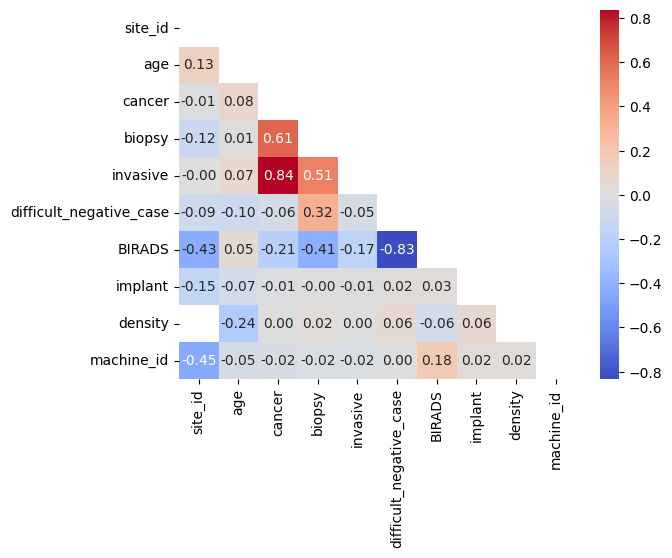

In [99]:
numerical = train[['site_id','age','cancer','biopsy','invasive','difficult_negative_case','BIRADS','implant','density','machine_id']]
corr_matrix = numerical.corr()
mask = np.triu(corr_matrix)
sn.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap='coolwarm')
plt.show()

In [106]:
print(train[train['patient_id']==10130][['image_id','view','laterality','density','implant','cancer']])

      image_id view  laterality  density  implant  cancer
87   388811999  MLO           1      1.0        0       1
88   613462606   CC           1      1.0        0       1
89  1360338805   CC           1      1.0        0       1
90  1672636630  MLO           1      1.0        0       1
91  1013166704   CC           0      1.0        0       0
92  1165309236   CC           0      1.0        0       0
93  2110820077  MLO           0      1.0        0       0
